<a href="https://colab.research.google.com/github/samyzaf/notebooks/blob/main/fdm_de_airy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solving a second order linear equation by FDM**

* We show how to find a numerical solution to
  the [**Airy ordinary differential equation**](https://en.wikipedia.org/wiki/Airy_function)
  with two boundary conditions  

  $\qquad
  \left\{
  \begin{array}{l}
  y'' - xy = 0, \quad -3 < x < 3
  \\
  y(-3) = 4
  \\
  y(3) = -5
  \end{array}
  \right.
  \newcommand{\Dx}{\Delta x}
  \newcommand{\Dy}{\Delta y}
  \newcommand{\Dz}{\Delta z}
  \newcommand{\Dt}{\Delta t}
  \newcommand{\Ds}{\Delta s}
  \newcommand{\Du}{\Delta u}
  \newcommand{\U}{\mathbf{U}}
  $  

* Our interval $[-3,3]$ is divided to $n$ equal subintervals
  with nodes $x_i = -3+i\Dx$, where $\Dx=6/n$.

* By existence and uniqueness, the equation has a
  solution $y=y(x)$.
  We will compute a discrete approximation to
  $y_i = y(x_i)$.

* We use the central difference second derivative formula  

  $\qquad\displaystyle
  y'' = \frac{y_{i+1} - 2y_{i} + y_{i-1}}{\Dx^2}
  $

* We use $d=\Dx$, and plug into the equation

  $\qquad\displaystyle
   \frac{y_{i+1} - 2y_{i} + y_{i-1}}{d^2} - x_i y_i = 0
  $

* We receive a system of $n+1$ linear equations
  in $n+1$ unknowns $y_i$, $i=0,1,2,\ldots,n$  

  $\qquad\left\{
  \begin{array}{l}
  y_0 = 4
  \\
  y_{i-1} - (d^2 x_i + 2)y_{i} + y_{i+1} = 0, \quad i=1,2,\ldots,n-1
  \\
  y_{n} = -5
  \end{array}\right.
  $

* Most of the equations are homogenous, except for
  the first one ($y_0=4$) and the last one ($y_n=-5$).
  It's already in a diagonal reduce form so it
  must have a unique soltion.


In [1]:
%pip install -q https://samyzaf.com/fdmtools-4.zip
from fdmtools import *

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


* First we define our grid parameters.
* For a start we use a small division size $N=100$.

In [2]:
a = -3                   # Interval = [-3,3]
b = 3
N = 1000                 # Division size
d = (b-a)/N             # x step
X = np.array([a + i*d for i in range(N+1)])  # x nodes
Y = np.zeros(N+1)        # y nodes (initialized to zero)

* Linear system of (n+1) equations, (n+1) variables:
  $AY = B$
* $A$ is our coefficients matrix of order
  $(n+1)\times(n+1)$.
* $B$ is our right side coefficients array.

In [3]:
A = np.zeros((N+1, N+1))
B = np.zeros(N+1)
X = [a+i*d for i in range(N+1)]

* We now construct our coefficients matrix $A$ by rows,
  from row $1$ to row $n-1$
* Row $0$ and row $n$ will be done separately.

In [5]:
for i in range(1, N):
    A[i,i-1] = 1
    A[i,i] = -d**2 * X[i] - 2
    A[i,i+1] = 1
    B[i] = 0

* # We need two more equation to complete
  our $(N+1){\times}(N+1)$ linear system:
* The boundary condition y(0) = 4 implies



In [6]:
A[0,0] = 1
B[0] = 4


* The boundary condition y(3) = -5 implies equation `Y[n] = -5`.
* Hence in matrix terms this ammounts to


In [7]:
A[N,N] = 1
B[N] = -5

* Now we are ready to solve our system.

In [8]:
Y = np.linalg.solve(A, B)

* Lets draw the graph of **Y**.

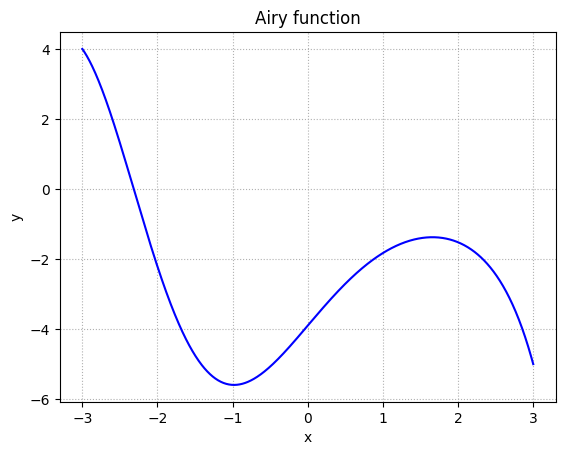

In [10]:
X = np.linspace(a, b ,N+1)
plt.plot(X, Y, color="blue", linewidth=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Airy function")
plt.grid('on', linestyle=':')
#plt.savefig("airy.png", dpi=150, bbox_inches='tight')
plt.show()
